# **Classifying Student Academic Performance Using Machine Learning**

**Goal:**  
Build and evaluate machine learning models to classify student performance (Low / Medium / High) using academic, behavioural, and socio-economic features.

**Key Steps**
1. Import dataset from the **UCI Machine Learning Repository**  
2. Perform **EDA and preprocessing**  
3. Engineer **Low/Medium/High** target categories from grades  
4. Train **Logistic Regression**, **KNN**, and **SVC** models  
5. Evaluate performance with metrics and visualizations  
6. Interpret model importance using **Permutation Importance**


# **Import Libraries**
This cell installs and imports all necessary libraries for data loading, preprocessing, visualization, and model building.


In [1]:
pip install ucimlrepo

In [2]:

import warnings
warnings.filterwarnings('ignore')
from sklearn.base import clone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)
from sklearn.inspection import permutation_importance

from time import perf_counter
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, roc_auc_score
)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(" Libraries imported successfully.")


 Libraries imported successfully.


# **Load Dataset from UCI Repository**
We fetch the **Student Performance** dataset (ID = 320) directly using the `ucimlrepo` library.


In [3]:
# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Extract features and target
X = student_performance.data.features
y = student_performance.data.targets

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)
print("Combined DataFrame shape:", df.shape)

df.head()


Features shape: (649, 30)
Target shape: (649, 3)
Combined DataFrame shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# **Exploratory Data Analysis (EDA)**
Let's explore data types, missing values, and summary statistics to understand dataset structure.


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    o

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


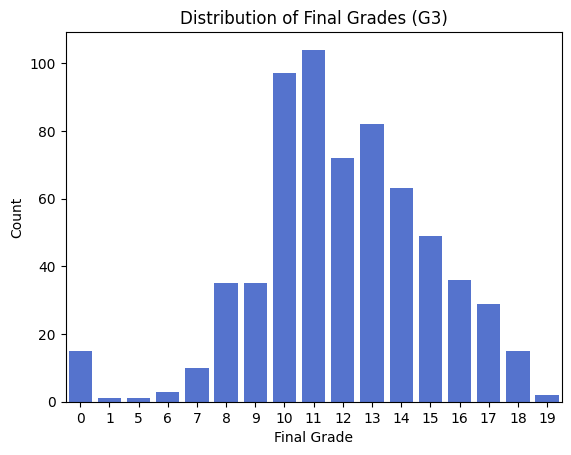

In [4]:
# Display dataset info
print("=== Dataset Info ===")
print(df.info())

# Missing values
print("\n=== Missing Values ===")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Summary statistics
display(df.describe())

# Countplot for target variable
sns.countplot(x='G3', data=df, color='royalblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()


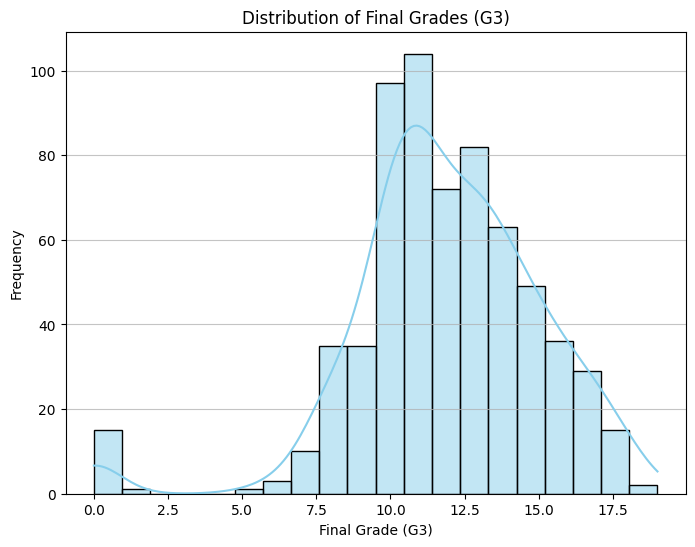

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### **Further Data Exploration**

Let's visualize the data to understand feature distributions and relationships.

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()



print("Numeric columns for plotting:", numeric_cols[:10])
print("Categorical columns for plotting:", categorical_cols[:10])

Numeric columns for plotting: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc']
Categorical columns for plotting: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup']


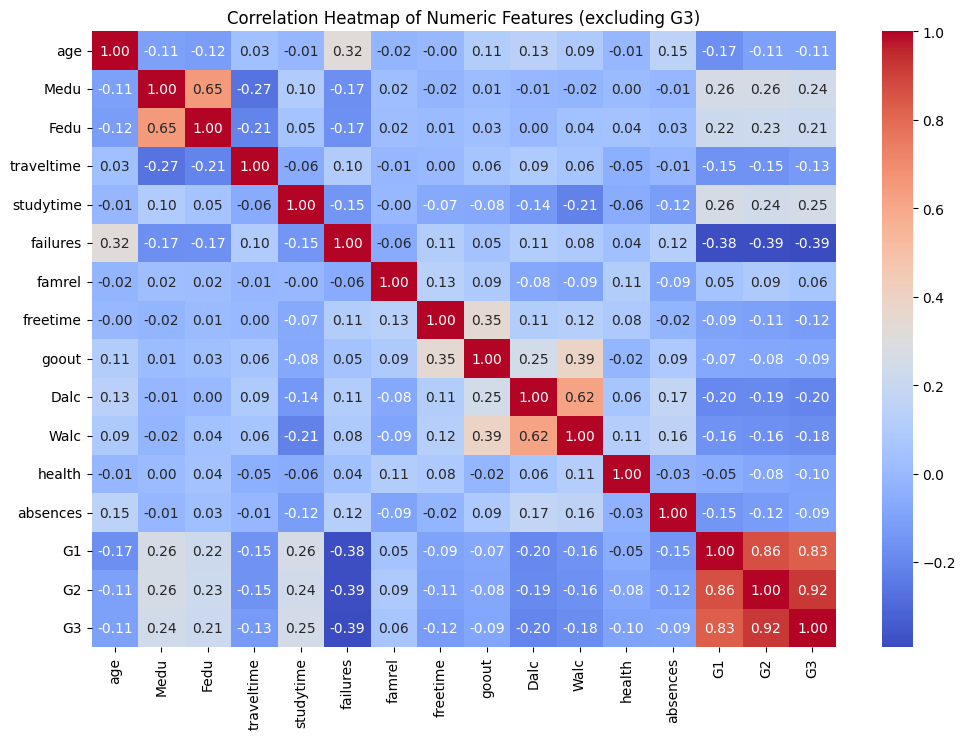

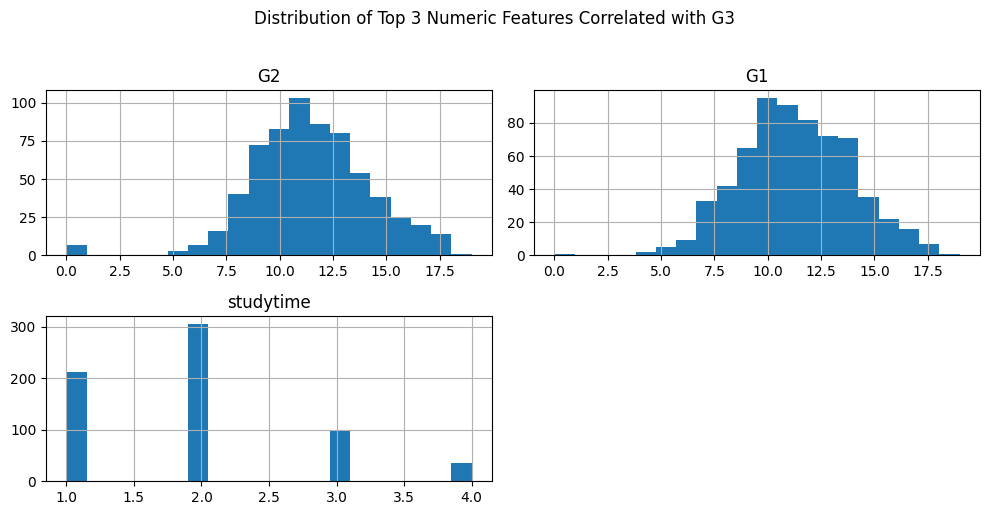

In [7]:
# Correlation heatmap (between numeric features, excluding G3 as per prior processing)
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features (excluding G3)")
plt.show()

# Select top 3 numerical columns most correlated with G3
# For this calculation, we need G3 to be present in the DataFrame
# We will use the full DataFrame for correlation and then extract G3's correlations.
correlations = df.select_dtypes(include=np.number).corr()['G3'].sort_values(ascending=False)

# Exclude G3 itself and then select top 3
top_correlated_cols = correlations.index[1:4].tolist()

# Distribution plots for top correlated numerical features
df[top_correlated_cols].hist(figsize=(10, 5), bins=20)
plt.suptitle("Distribution of Top 3 Numeric Features Correlated with G3", y=1.02)
plt.tight_layout()
plt.show()

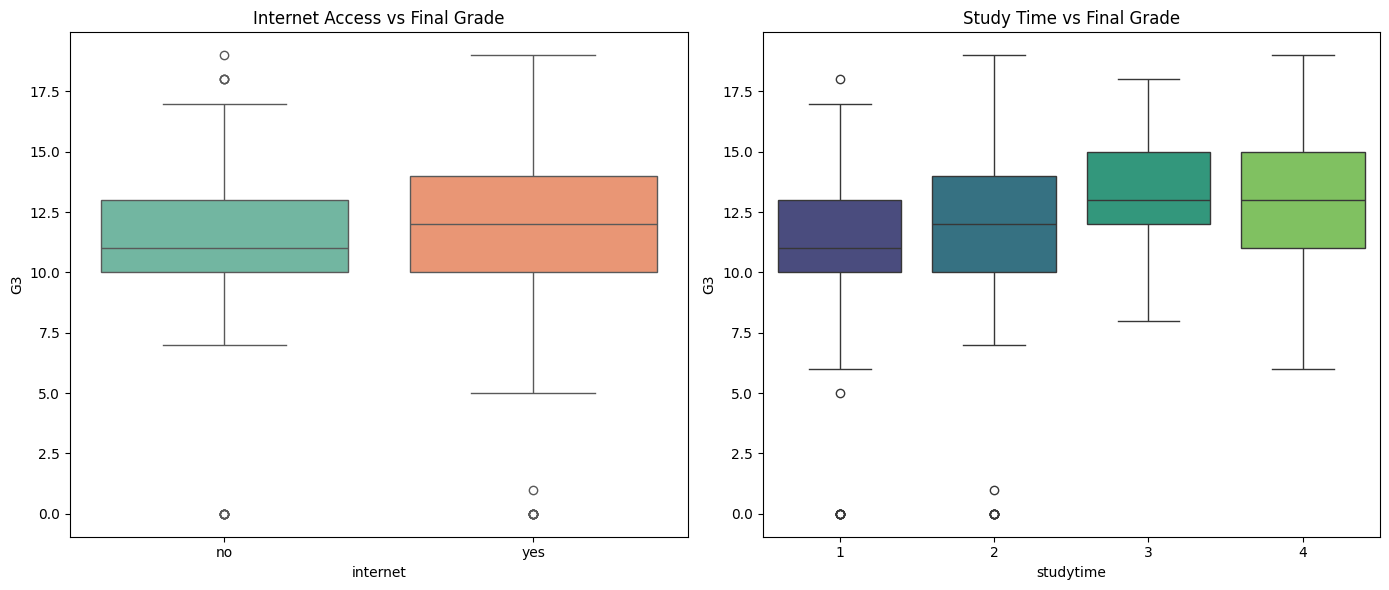

In [8]:
# Create a figure with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Impact of Internet Access on Final Grade
sns.boxplot(x='internet', y='G3', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Internet Access vs Final Grade')

# Impact of Study Time on Final Grade
sns.boxplot(x='studytime', y='G3', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Study Time vs Final Grade')

plt.tight_layout()
plt.show()

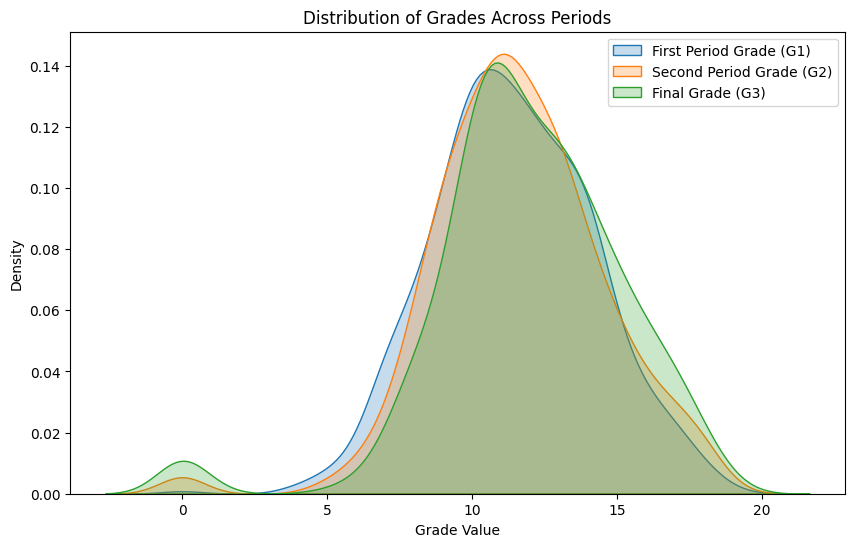

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['G1'], label='First Period Grade (G1)', fill=True)
sns.kdeplot(df['G2'], label='Second Period Grade (G2)', fill=True)
sns.kdeplot(df['G3'], label='Final Grade (G3)', fill=True)
plt.title("Distribution of Grades Across Periods")
plt.xlabel("Grade Value")
plt.legend()
plt.show()

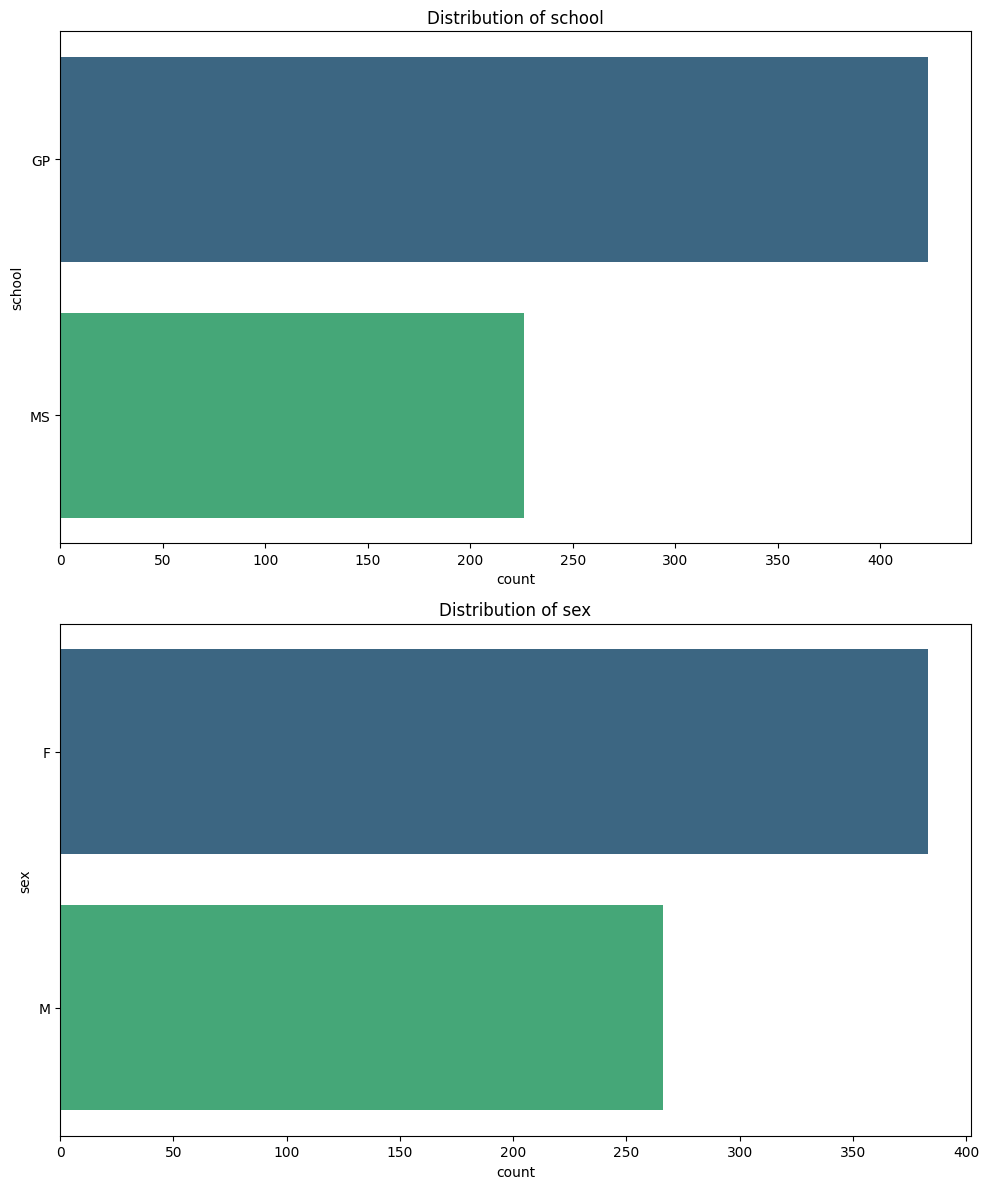

In [10]:
# Distribution plots for categorical features
# You can specify which columns to plot by changing the list below.
cols_to_plot = categorical_cols[:2] # Example: plots the first two categorical columns

fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(10, 6 * len(cols_to_plot)))

# Ensure axes is an array even if only one column is plotted
if len(cols_to_plot) == 1:
    axes = [axes]

for i, col in enumerate(cols_to_plot):
    sns.countplot(y=col, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# **Regression**

## **Apply model using Regression**

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter

# Scikit-Learn Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


## **Featurees and Model Define**

In [15]:

baseline_results = {}
#  DATA PREPARATION
# Dropping G1/G2 for early intervention utility
X = df.drop(columns=['G1', 'G2', 'G3'], errors='ignore')
if 'G3_binned' in X.columns:
    X = X.drop(columns=['G3_binned'])

y = df['G3']

# Identify column types strictly
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

#  PREPROCESSING PIPELINE
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

#  DEFINE MODELS & GRIDSEARCH PARAMETERS
models = {
    "Ridge": Ridge(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

## **Data Splitting**

In [16]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Training**

In [17]:


print("--- PHASE 1: Training Baseline Models (Full Evaluation) ---")

for name, model in models.items():
    # Simple pipeline without GridSearchCV
    baseline_pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])

    baseline_pipe.fit(X_train, y_train)
    y_pred_base = baseline_pipe.predict(X_test)

    # Calculate Full Suite of Metrics
    mae_base = mean_absolute_error(y_test, y_pred_base)
    mse_base = mean_squared_error(y_test, y_pred_base)
    rmse_base = np.sqrt(mse_base)
    r2_base = r2_score(y_test, y_pred_base)
    mape_base = mean_absolute_percentage_error(y_test, y_pred_base)

    # Calculate Adjusted R2 (Important for professors!)
    # Adjusted R2 penalizes for adding irrelevant features
    n = X_test.shape[0] # Number of observations
    p = X_test.shape[1] # Number of predictors
    adj_r2 = 1 - (1 - r2_base) * (n - 1) / (n - p - 1)

    baseline_results[name] = {
        "MAE": round(mae_base, 3),
        "RMSE": round(rmse_base, 3),
        "R2": round(r2_base, 3),
        "Adj_R2": round(adj_r2, 3),

    }

    print(f"Model: {name}")
    print(f"  - MAE: {mae_base:.3f} | RMSE: {rmse_base:.3f}")
    print(f"  - R2: {r2_base:.3f} | Adj R2: {adj_r2:.3f}")
    print("-" * 30)

# Convert to DataFrame
df_baseline = pd.DataFrame(baseline_results).T
print("\nFINAL BASELINE PERFORMANCE TABLE:")
print(df_baseline)

--- PHASE 1: Training Baseline Models (Full Evaluation) ---
Model: Ridge
  - MAE: 2.152 | RMSE: 2.858
  - R2: 0.162 | Adj R2: -0.091
------------------------------
Model: SVR
  - MAE: 2.049 | RMSE: 2.825
  - R2: 0.182 | Adj R2: -0.066
------------------------------
Model: KNN
  - MAE: 2.158 | RMSE: 2.929
  - R2: 0.120 | Adj R2: -0.146
------------------------------

FINAL BASELINE PERFORMANCE TABLE:
         MAE   RMSE     R2  Adj_R2
Ridge  2.152  2.858  0.162  -0.091
SVR    2.049  2.825  0.182  -0.066
KNN    2.158  2.929  0.120  -0.146


#**Grid SearchCV**

Starting GridSearch for Regression on 3 models...


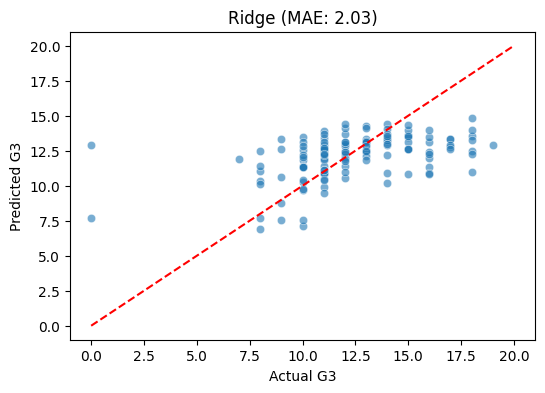

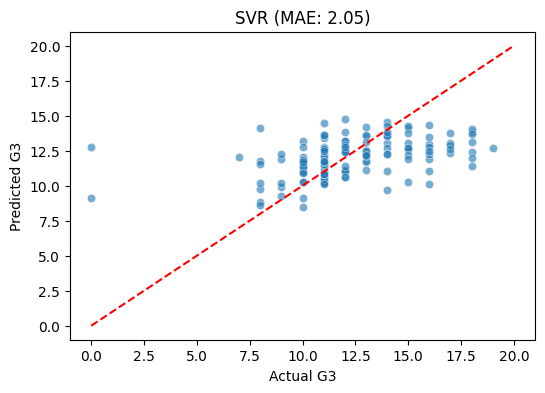

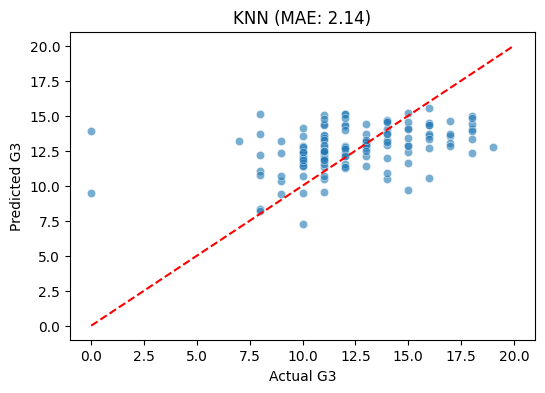


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 FINAL REGRESSION SUMMARY (GRIDSEARCH OPTIMIZED) 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                                    Best_Params    MAE   RMSE     R2  Adj_R2  Time_s
Ridge                                   {'model__alpha': 100.0}  2.026  2.775  0.210  -0.396    2.97
SVR                    {'model__C': 1, 'model__gamma': 'scale'}  2.049  2.825  0.182  -0.446    1.92
KNN    {'model__n_neighbors': 11, 'model__weights': 'distance'}  2.142  2.906  0.134  -0.530    1.03


In [18]:



param_grids = {
    "Ridge": {"model__alpha": [0.1, 1.0, 10.0, 100.0]},
    "SVR": {"model__C": [0.1, 1, 10, 100], "model__gamma": ["scale", "auto"]},
    "KNN": {"model__n_neighbors": [3, 5, 7, 11], "model__weights": ["uniform", "distance"]}
}


results = {}

# 4. EXECUTION LOOP
print(f"Starting GridSearch for Regression on {len(models)} models...")

for name, model in models.items():
    pipeline = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])

    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    t0 = perf_counter()
    grid.fit(X_train, y_train)
    duration = perf_counter() - t0

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # --- METRIC CALCULATIONS ---
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Adjusted R2 Calculation
    # n = observations, p = number of features after one-hot encoding
    n = X_test.shape[0]
    p = best_model.named_steps['prep'].transform(X_test).shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {
        "Best_Params": str(grid.best_params_),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "R2": round(r2, 3),
        "Adj_R2": round(adj_r2, 3),

        "Time_s": round(duration, 2)
    }

    # Visual Output
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([0, 20], [0, 20], '--r', label='Ideal')
    plt.title(f"{name} (MAE: {mae:.2f})")
    plt.xlabel("Actual G3")
    plt.ylabel("Predicted G3")
    plt.show()

# 5. FINAL COMPARISON TABLE
print("\n" + "!"*50)
print(" FINAL REGRESSION SUMMARY (GRIDSEARCH OPTIMIZED) ")
print("!"*50)

summary_df = pd.DataFrame.from_dict(results, orient='index')
print(summary_df.sort_values(by="MAE").to_string())

## **Kfold**

In [21]:
from sklearn.model_selection import KFold
from sklearn.base import clone

# 1. Define the K-Fold strategy
# We use 5 folds, which is standard for datasets of this size
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Using the best models we defined in the previous step
# Note: I'm using the best parameters found by your GridSearch
tuned_models = {
    "Ridge_Tuned": Ridge(alpha=10.0),
    "SVR_Tuned": SVR(C=1, gamma='scale'),
    "KNN_Tuned": KNeighborsRegressor(n_neighbors=11, weights='distance')
}

cv_results = {}

print(f"Starting 5-Fold Cross-Validation on Regression Models...")
print("Goal: Validate stability without G1/G2 leakage.\n")

for name, base_model in tuned_models.items():
    mae_scores = []
    r2_scores = []

    # Stratify is not used for regression, so we use standard kf.split
    for train_idx, val_idx in kf.split(X):
        # Split
        X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]

        # Fit Preprocessor inside the fold to avoid Data Leakage
        prep = clone(preprocessor).fit(X_tr)
        X_tr_p = prep.transform(X_tr)
        X_va_p = prep.transform(X_va)

        # Train
        model = clone(base_model).fit(X_tr_p, y_tr)

        # Predict & Evaluate
        y_pred = model.predict(X_va_p)
        mae_scores.append(mean_absolute_error(y_va, y_pred))
        r2_scores.append(r2_score(y_va, y_pred))

    # Store and Print Results
    cv_results[name] = {
        "Mean_MAE": np.mean(mae_scores),
        "Std_MAE": np.std(mae_scores),
        "Mean_R2": np.mean(r2_scores)
    }

    print(f"===== {name} =====")
    print(f"MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
    print(f"R2 : {np.mean(r2_scores):.4f}\n")

# Final Comparison Table
cv_summary = pd.DataFrame(cv_results).T
print("Final CV Summary Table:")
print(cv_summary.to_string())

Starting 5-Fold Cross-Validation on Regression Models...
Goal: Validate stability without G1/G2 leakage.

===== Ridge_Tuned =====
MAE: 1.9912 ± 0.1128
R2 : 0.2551

===== SVR_Tuned =====
MAE: 1.9437 ± 0.1594
R2 : 0.2783

===== KNN_Tuned =====
MAE: 2.0853 ± 0.2120
R2 : 0.2087

Final CV Summary Table:
             Mean_MAE   Std_MAE   Mean_R2
Ridge_Tuned  1.991230  0.112785  0.255112
SVR_Tuned    1.943721  0.159362  0.278272
KNN_Tuned    2.085266  0.211955  0.208703


 ## **Top Predictor**

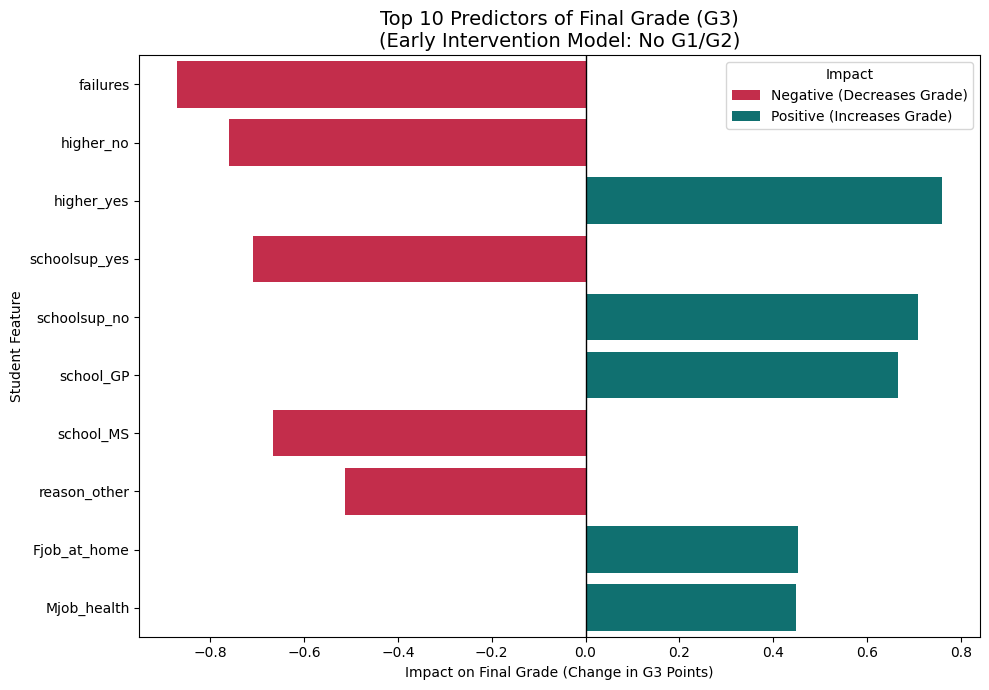

--- ACTIONABLE INSIGHTS---


,Feature,Coefficient,Impact
0,failures,-0.869793,Negative (Decreases Grade)
1,higher_no,-0.759478,Negative (Decreases Grade)
2,higher_yes,0.759478,Positive (Increases Grade)
3,schoolsup_yes,-0.708130,Negative (Decreases Grade)
4,schoolsup_no,0.708130,Positive (Increases Grade)
5,school_GP,0.665143,Positive (Increases Grade)
6,school_MS,-0.665143,Negative (Decreases Grade)
7,reason_other,-0.513066,Negative (Decreases Grade)
8,Fjob_at_home,0.453668,Positive (Increases Grade)
9,Mjob_health,0.448475,Positive (Increases Grade)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Instantiate and Fit the Optimized Regression Model (Ridge)
# We use Ridge because it provides 'coef_', allowing us to see which features
# drive the G3 score up or down.
best_ridge = Ridge(alpha=10.0)

# Ensure the preprocessor and model are fitted on the training data
# that EXCLUDES G1 and G2.
pipeline_final = Pipeline([
    ('prep', preprocessor),
    ('model', best_ridge)
])

pipeline_final.fit(X_train, y_train)

# 2. Extract Feature Names from the Pipeline
# This handles the OneHotEncoded names correctly
cat_feature_names = pipeline_final.named_steps['prep'].named_transformers_['cat'].get_feature_names_out(cat_cols).tolist()
num_feature_names = num_cols.tolist()
all_feature_names = num_feature_names + cat_feature_names

# 3. Extract Coefficients
# In Regression, these represent the change in G3 grade for every 1-unit change in the feature
coeffs = pipeline_final.named_steps['model'].coef_

# 4. Create Importance DataFrame
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coeffs,
    'Abs_Coefficient': np.abs(coeffs),
    'Impact': ["Positive (Increases Grade)" if c > 0 else "Negative (Decreases Grade)" for c in coeffs]
})

# Sort by absolute impact to see the 10 most "powerful" predictors
top_10_importance = importance_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# 5. Visualization
plt.figure(figsize=(10, 7))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=top_10_importance,
    hue="Impact",
    dodge=False,
    palette={"Positive (Increases Grade)": "teal", "Negative (Decreases Grade)": "crimson"}
)

plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.title("Top 10 Predictors of Final Grade (G3)\n(Early Intervention Model: No G1/G2)", fontsize=14)
plt.xlabel("Impact on Final Grade (Change in G3 Points)")
plt.ylabel("Student Feature")
plt.tight_layout()
plt.show()

# 6. Actionable Insights Table
print("--- ACTIONABLE INSIGHTS---")
display(top_10_importance[['Feature', 'Coefficient', 'Impact']].reset_index(drop=True))

##  **Residuals (Errors)**

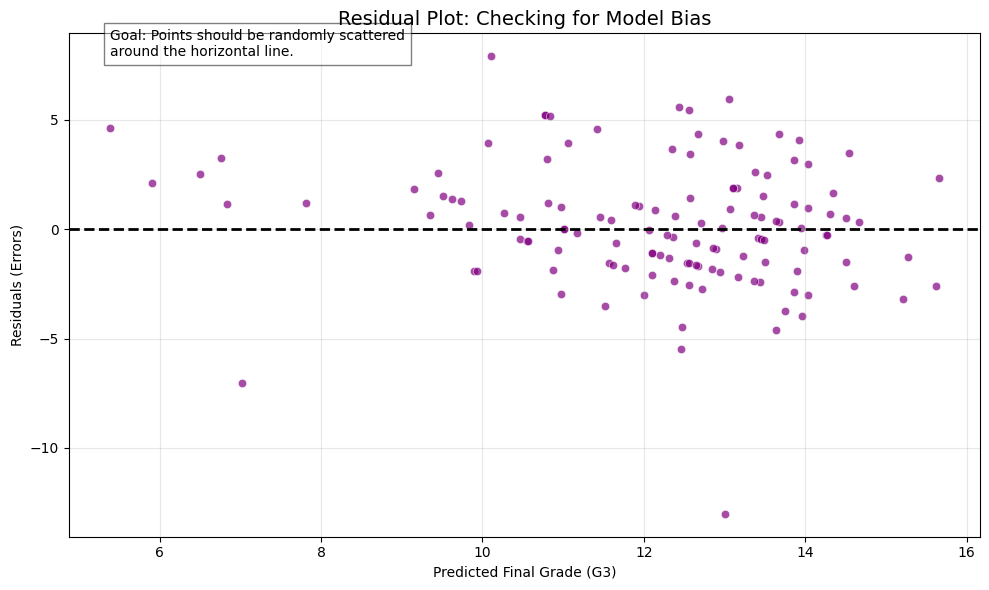

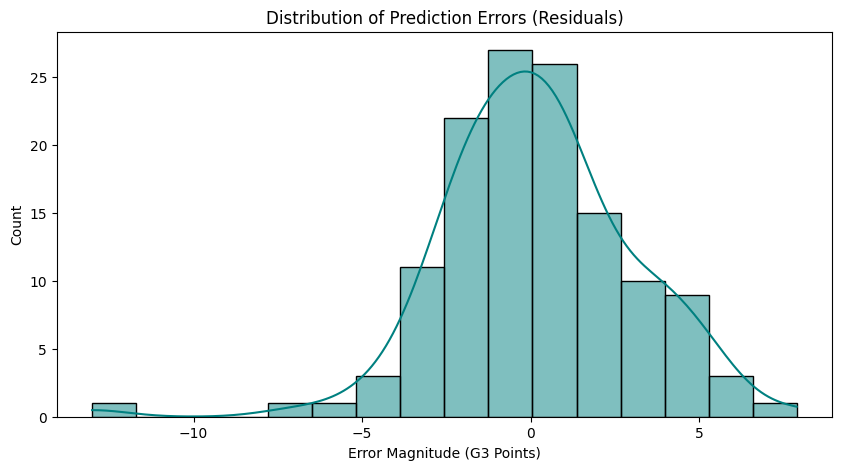

--- MODEL DIAGNOSTICS ---
Mean Residual (Bias): 0.1886
Interpretation: A mean near zero indicates the model is not systematically over or under-predicting.


In [20]:
# 1. Calculate Residuals (Errors)
# Residuals = Actual Grade - Predicted Grade
y_pred_final = pipeline_final.predict(X_test)
residuals = y_test - y_pred_final

# 2. Visualization: Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

plt.title("Residual Plot: Checking for Model Bias", fontsize=14)
plt.xlabel("Predicted Final Grade (G3)")
plt.ylabel("Residuals (Errors)")
plt.grid(True, alpha=0.3)

# Add a text annotation for interpretation
plt.text(min(y_pred_final), max(residuals),
         "Goal: Points should be randomly scattered\naround the horizontal line.",
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

# 3. Distribution of Errors
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='teal')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error Magnitude (G3 Points)")
plt.show()

# 4. Final Scientific Conclusion
print("--- MODEL DIAGNOSTICS ---")
print(f"Mean Residual (Bias): {np.mean(residuals):.4f}")
print("Interpretation: A mean near zero indicates the model is not systematically over or under-predicting.")